## 深度學習 - 樣型識別5

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 16s 39ms/step - loss: 0.6304 - accuracy: 0.8095 - val_loss: 0.3913 - val_accuracy: 0.8670
Epoch 2/10
375/375 [==============================] - 8s 21ms/step - loss: 0.2553 - accuracy: 0.9204 - val_loss: 0.1907 - val_accuracy: 0.9425
Epoch 3/10
375/375 [==============================] - 7s 20ms/step - loss: 0.1683 - accuracy: 0.9480 - val_loss: 0.1495 - val_accuracy: 0.9569
Epoch 4/10
375/375 [==============================] - 8s 20ms/step - loss: 0.1181 - accuracy: 0.9635 - val_loss: 0.1462 - val_accuracy: 0.9564
Epoch 5/10
375/375 [==============================] - 8s 20ms/step - loss: 0.0871 - accuracy: 0.9726 - val_loss: 0.1394 - val_accuracy: 0.9578
Epoch 6/10
375/375 [==============================] - 8s 20ms/step - loss: 0.0643 - accuracy: 0.9798 - val_loss: 0.1265 - val_accuracy: 0.9640
Epoch 7/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0478 - accuracy: 0.9846 - val_loss: 0.1429 - val_accuracy: 0.962

**Plotting a validation accuracy comparison**

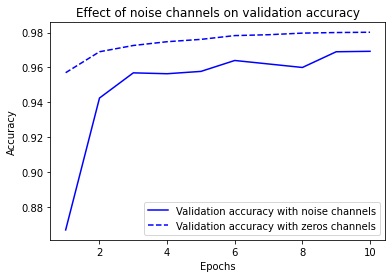

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 5s 13ms/step - loss: 2.3162 - accuracy: 0.1045 - val_loss: 2.3065 - val_accuracy: 0.1058
Epoch 2/100
375/375 [==============================] - 5s 12ms/step - loss: 2.2993 - accuracy: 0.1168 - val_loss: 2.3107 - val_accuracy: 0.1022
Epoch 3/100
375/375 [==============================] - 5s 12ms/step - loss: 2.2907 - accuracy: 0.1284 - val_loss: 2.3121 - val_accuracy: 0.1053
Epoch 4/100
375/375 [==============================] - 5s 13ms/step - loss: 2.2762 - accuracy: 0.1408 - val_loss: 2.3201 - val_accuracy: 0.1048
Epoch 5/100
375/375 [==============================] - 5s 12ms/step - loss: 2.2589 - accuracy: 0.1545 - val_loss: 2.3338 - val_accuracy: 0.1045
Epoch 6/100
375/375 [==============================] - 5s 12ms/step - loss: 2.2374 - accuracy: 0.1704 - val_loss: 2.3521 - val_accuracy: 0.1070
Epoch 7/100
375/375 [==============================] - 5s 12ms/step - loss: 2.2127 - accuracy: 0.1824 - val_loss: 2.3657 - val_accuracy:

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 17ms/step - loss: 1116.0464 - accuracy: 0.3897 - val_loss: 2.1458 - val_accuracy: 0.2442
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 3.9145 - accuracy: 0.2771 - val_loss: 2.2239 - val_accuracy: 0.2243
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 3.2605 - accuracy: 0.2849 - val_loss: 2.5575 - val_accuracy: 0.2661
Epoch 4/10
375/375 [==============================] - 5s 12ms/step - loss: 2.8903 - accuracy: 0.2853 - val_loss: 3.1158 - val_accuracy: 0.3061
Epoch 5/10
375/375 [==============================] - 5s 12ms/step - loss: 2.8509 - accuracy: 0.2664 - val_loss: 3.9353 - val_accuracy: 0.2882
Epoch 6/10
375/375 [==============================] - 5s 12ms/step - loss: 2.5972 - accuracy: 0.2761 - val_loss: 2.3276 - val_accuracy: 0.2597
Epoch 7/10
375/375 [==============================] - 5s 12ms/step - loss: 2.7053 - accuracy: 0.2803 - val_loss: 20.8398 - val_accuracy: 0.

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 0.3644 - accuracy: 0.9126 - val_loss: 0.1667 - val_accuracy: 0.9545
Epoch 2/10
375/375 [==============================] - 5s 12ms/step - loss: 0.1424 - accuracy: 0.9645 - val_loss: 0.2390 - val_accuracy: 0.9553
Epoch 3/10
375/375 [==============================] - 5s 12ms/step - loss: 0.1172 - accuracy: 0.9731 - val_loss: 0.1856 - val_accuracy: 0.9668
Epoch 4/10
375/375 [==============================] - 5s 12ms/step - loss: 0.1030 - accuracy: 0.9779 - val_loss: 0.1930 - val_accuracy: 0.9698
Epoch 5/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0821 - accuracy: 0.9832 - val_loss: 0.2368 - val_accuracy: 0.9689
Epoch 6/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0845 - accuracy: 0.9833 - val_loss: 0.2438 - val_accuracy: 0.9689
Epoch 7/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0734 - accuracy: 0.9871 - val_loss: 0.2415 - val_accuracy: 0.9741

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6726 - accuracy: 0.8368 - val_loss: 0.3602 - val_accuracy: 0.9044
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3510 - accuracy: 0.9029 - val_loss: 0.3059 - val_accuracy: 0.9150
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3153 - accuracy: 0.9122 - val_loss: 0.2911 - val_accuracy: 0.9184
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2995 - accuracy: 0.9159 - val_loss: 0.2811 - val_accuracy: 0.9219
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2895 - accuracy: 0.9189 - val_loss: 0.2761 - val_accuracy: 0.9227
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2830 - accuracy: 0.9212 - val_loss: 0.2707 - val_accuracy: 0.9254
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2781 - accuracy: 0.9223 - val_loss: 0.2699 - val_accuracy: 0.9262
Epoch 

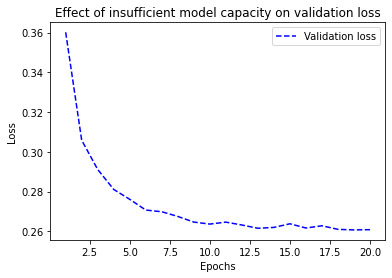

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.3551 - accuracy: 0.8993 - val_loss: 0.1731 - val_accuracy: 0.9525
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1595 - accuracy: 0.9528 - val_loss: 0.1452 - val_accuracy: 0.9578
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1137 - accuracy: 0.9657 - val_loss: 0.1430 - val_accuracy: 0.9587
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0879 - accuracy: 0.9736 - val_loss: 0.1164 - val_accuracy: 0.9656
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0702 - accuracy: 0.9791 - val_loss: 0.0976 - val_accuracy: 0.9732
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0583 - accuracy: 0.9822 - val_loss: 0.0954 - val_accuracy: 0.9745
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0486 - accuracy: 0.9856 - val_loss: 0.0954 - val_accuracy: 0.9743
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.5324 - accuracy: 0.7737 - val_loss: 0.4080 - val_accuracy: 0.8725
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3228 - accuracy: 0.8997 - val_loss: 0.3395 - val_accuracy: 0.8702
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2351 - accuracy: 0.9255 - val_loss: 0.2844 - val_accuracy: 0.8916
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1895 - accuracy: 0.9396 - val_loss: 0.2731 - val_accuracy: 0.8948
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1530 - accuracy: 0.9526 - val_loss: 0.2830 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1244 - accuracy: 0.9630 - val_loss: 0.3025 - val_accuracy: 0.8835
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1040 - accurac

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.6791 - accuracy: 0.6146 - val_loss: 0.6590 - val_accuracy: 0.7043
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.6366 - accuracy: 0.7283 - val_loss: 0.6227 - val_accuracy: 0.6690
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.5946 - accuracy: 0.7699 - val_loss: 0.5856 - val_accuracy: 0.7562
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.5553 - accuracy: 0.8114 - val_loss: 0.5549 - val_accuracy: 0.7857
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.5201 - accuracy: 0.8385 - val_loss: 0.5279 - val_accuracy: 0.8351
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4898 - accuracy: 0.8629 - val_loss: 0.5091 - val_accuracy: 0.8093
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.4632 - accuracy: 0.8785 - val_loss: 0.4940 - val_accuracy: 0.8143
Epoch 8/20
30

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 10s 316ms/step - loss: 0.5402 - accuracy: 0.7425 - val_loss: 0.3096 - val_accuracy: 0.8817
Epoch 2/20
30/30 [==============================] - 9s 301ms/step - loss: 0.2546 - accuracy: 0.8985 - val_loss: 0.2901 - val_accuracy: 0.8853
Epoch 3/20
30/30 [==============================] - 9s 301ms/step - loss: 0.1627 - accuracy: 0.9351 - val_loss: 0.2734 - val_accuracy: 0.8843
Epoch 4/20
30/30 [==============================] - 9s 303ms/step - loss: 0.0903 - accuracy: 0.9709 - val_loss: 0.3415 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 9s 304ms/step - loss: 0.0109 - accuracy: 0.9977 - val_loss: 0.6001 - val_accuracy: 0.8720
Epoch 6/20
30/30 [==============================] - 9s 301ms/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.6371 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 9s 301ms/step - loss: 0.3013 - accuracy: 0.9794 - val_loss: 0.5378 - val_accuracy: 0.8851
Epoch

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 107ms/step - loss: 0.5980 - accuracy: 0.7785 - val_loss: 0.4628 - val_accuracy: 0.8737
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3985 - accuracy: 0.8945 - val_loss: 0.3868 - val_accuracy: 0.8841
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3366 - accuracy: 0.9109 - val_loss: 0.3655 - val_accuracy: 0.8871
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3002 - accuracy: 0.9242 - val_loss: 0.3533 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2790 - accuracy: 0.9304 - val_loss: 0.3539 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2638 - accuracy: 0.9373 - val_loss: 0.3535 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2518 - accuracy: 0.9416 - val_loss: 0.3554 - val_accuracy: 0.8861
Epoch 8/20
3

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 52ms/step - loss: 0.6386 - accuracy: 0.6237 - val_loss: 0.5176 - val_accuracy: 0.8491
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.5275 - accuracy: 0.7566 - val_loss: 0.4014 - val_accuracy: 0.8703
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.4394 - accuracy: 0.8159 - val_loss: 0.3363 - val_accuracy: 0.8833
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3721 - accuracy: 0.8593 - val_loss: 0.2948 - val_accuracy: 0.8886
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3197 - accuracy: 0.8822 - val_loss: 0.2822 - val_accuracy: 0.8895
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2771 - accuracy: 0.9042 - val_loss: 0.2746 - val_accuracy: 0.8923
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2437 - accuracy: 0.9167 - val_loss: 0.2938 - val_accuracy: 0.8847
Epoch 8/20
30